# 这个文件没有作用，仅供编程手了解数据集

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams['font.size'] = 12  # 字体大小
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

In [2]:
df = pd.read_excel("赛题附件\\附件1.xlsx")
m, n = df.shape
df.columns
# df.head()

Index(['受试者编号', '研究开始时间', '研究结束时间', '性别', '年龄', '身高', '体重', 'ASA', '有无手术史',
       '手术说明',
       ...
       '如果有，那么是出现了腹腹痛', '如果有，那么是出现了腹都有', '有没出现腹胀腹痛的情况呢无', '还有没其他不舒服的情况呢有',
       '还有没其他不舒服的情况呢无', '术后24内患者的满意度评价非常满意', '术后24内患者的满意度评价满意',
       '术后24内患者的满意度评价一般', '术后24内患者的满意度评价不满意', '术后24内患者的满意度评价非常不满意'],
      dtype='object', length=185)

## 首先看看开始时间和结束时间是不是一定在一天

In [3]:
test1 = []

for i in range(0, m):
    if df.iloc[i, 1] != df.iloc[i, 2]:
        test1.append(i)

if test1 == []:
    print("经验证，实验均在一天时间内开展！") 

# 由上面的结论可知：第1、2、3列都没用了
df1 = df.drop(['受试者编号', '研究开始时间', '研究结束时间'], axis=1)
# df1.head()

经验证，实验均在一天时间内开展！


## 然后看看缺失值的情况，放在探索信息文件夹里

In [4]:
# 输出缺失值，这个结果保存在赛题附件文件夹中，文件名为“缺失值情况.xlsx”
# (df.isnull().sum() / len(df)).to_excel('探索信息\\缺失值情况.xlsx')

print('共有 %.5s 各样本' % m)

共有 1245 各样本


In [334]:
df.columns

Index(['受试者编号', '研究开始时间', '研究结束时间', '性别', '年龄', '身高', '体重', 'ASA', '有无手术史',
       '手术说明',
       ...
       '如果有，那么是出现了腹腹痛', '如果有，那么是出现了腹都有', '有没出现腹胀腹痛的情况呢无', '还有没其他不舒服的情况呢有',
       '还有没其他不舒服的情况呢无', '术后24内患者的满意度评价非常满意', '术后24内患者的满意度评价满意',
       '术后24内患者的满意度评价一般', '术后24内患者的满意度评价不满意', '术后24内患者的满意度评价非常不满意'],
      dtype='object', length=185)

In [335]:
df2 = df1.drop(['手术说明', '既往史说明', '镇静追加2', '镇静追加3', '镇静追加4', '镇痛追加次数', 
                '镇痛药追加剂量', 'sbp005', 'dbp005', 'sbp015', 'dbp015', 'sbp025', 'dbp025', 
                'sbp15', 'dbp15', 
                'petco215', 'RR15', 'spo215', 'HR15', 'IPI15', 'moaas15', 'sbp20', 'dbp20', 
                'petco220', 'RR20', 'spo220', 'HR20', 'IPI20', 'moaas20', '术中其他程度', 
                '是否出现了恶心呕吐的情况是', '如果有，那么是出现了恶恶心', '如果有，那么是出现了恶呕吐', 
                '如果有，那么是出现了恶都有', '如果有，那么是出现了恶呕吐次数', '是否出现了头晕头昏头痛是', 
                '如果有，那么是出现了头头晕', '如果有，那么是出现了头头昏', '如果有，那么是出现了头头痛', 
                '如果有，那么是出现了头都有', '有没出现嗜睡乏力的情况呢有', '如果有，那么是出现了嗜嗜睡', 
                '如果有，那么是出现了嗜乏力', '如果有，那么是出现了嗜都有', '有没出现腹胀腹痛的情况呢有', 
                '如果有，那么是出现了腹腹胀', '如果有，那么是出现了腹腹痛', '如果有，那么是出现了腹都有', 
                '还有没其他不舒服的情况呢有', '术后24内患者的满意度评价非常满意', 
                '术后24内患者的满意度评价一般', '术后24内患者的满意度评价不满意', 
                '术后24内患者的满意度评价非常不满意'], axis=1)

## 数据清洗，也就是补全缺失值

In [336]:
# 分类特征用众数填补
# df2['Gender'].fillna(df2['Gender'].mode()[0], inplace=True)

# 数值特征用均值填补
df2['年龄'].fillna(df2['年龄'].mean(), inplace=True)
df2['petco200'].fillna(df2['petco200'].mean(), inplace=True)
df2['RR00'].fillna(df2['RR00'].mean(), inplace=True)
df2['spo200'].fillna(df2['spo200'].mean(), inplace=True)
df2['HR00'].fillna(df2['HR00'].mean(), inplace=True)
df2['IPI00'].fillna(df2['IPI00'].mean(), inplace=True)
df2['petco2005'].fillna(df2['petco2005'].mean(), inplace=True)
df2['RR005'].fillna(df2['RR005'].mean(), inplace=True)
df2['spo2005'].fillna(df2['spo2005'].mean(), inplace=True)
df2['HR005'].fillna(df2['HR005'].mean(), inplace=True)
df2['IPI005'].fillna(df2['IPI005'].mean(), inplace=True)
df2['sbp1'].fillna(df2['sbp1'].mean(), inplace=True)
df2['dbp1'].fillna(df2['dbp1'].mean(), inplace=True)
df2['petco21'].fillna(df2['petco21'].mean(), inplace=True)
df2['RR1'].fillna(df2['RR1'].mean(), inplace=True)
df2['spo21'].fillna(df2['spo21'].mean(), inplace=True)
df2['HR1'].fillna(df2['HR1'].mean(), inplace=True)
df2['IPI1'].fillna(df2['IPI1'].mean(), inplace=True)
df2['petco2jinjing'].fillna(df2['petco2jinjing'].mean(), inplace=True)
df2['RRjinjing'].fillna(df2['RRjinjing'].mean(), inplace=True)
df2['spo2jinjing'].fillna(df2['spo2jinjing'].mean(), inplace=True)
df2['HRjinjing'].fillna(df2['HRjinjing'].mean(), inplace=True)
df2['IPIjinjing'].fillna(df2['IPIjinjing'].mean(), inplace=True)
df2['petco2015'].fillna(df2['petco2015'].mean(), inplace=True)
df2['RR015'].fillna(df2['RR015'].mean(), inplace=True)
df2['spo2015'].fillna(df2['spo2015'].mean(), inplace=True)
df2['HR015'].fillna(df2['HR015'].mean(), inplace=True)
df2['IPI015'].fillna(df2['IPI015'].mean(), inplace=True)
df2['petco22'].fillna(df2['petco22'].mean(), inplace=True)
df2['RR2'].fillna(df2['RR2'].mean(), inplace=True)
df2['spo22'].fillna(df2['spo22'].mean(), inplace=True)
df2['HR2'].fillna(df2['HR2'].mean(), inplace=True)
df2['IPI2'].fillna(df2['IPI2'].mean(), inplace=True)


## 接着是数据可视化

### <center>受试者情况与病史采集

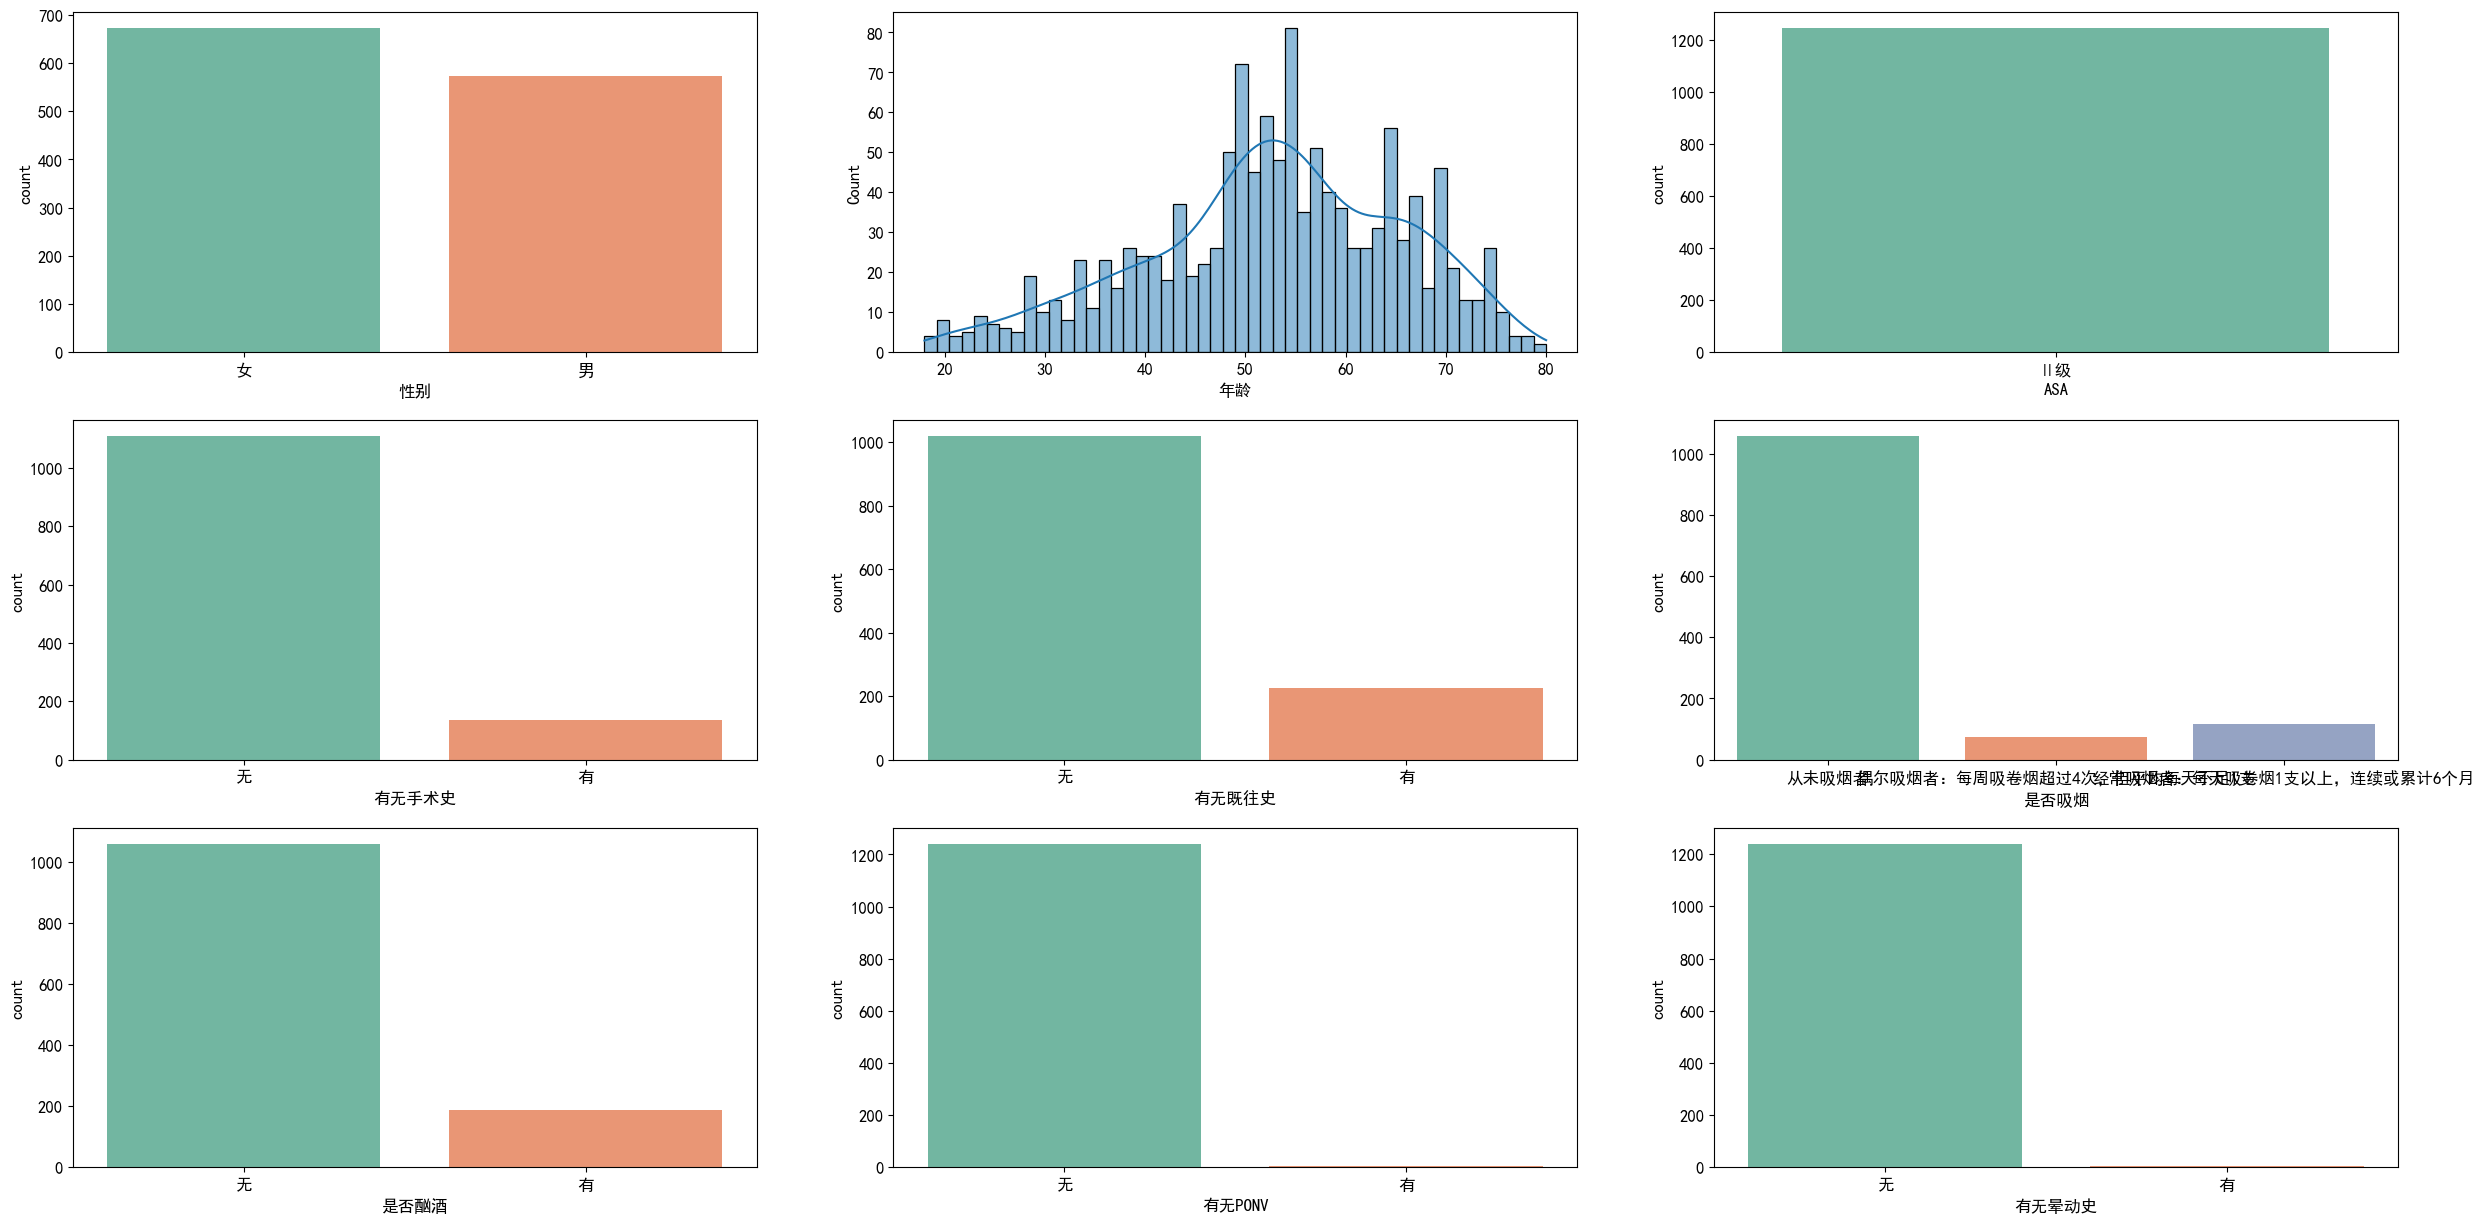

In [318]:
plt.figure(figsize=(30, 15))

plt.subplot(3, 3, 1)
sns.countplot(x='性别', palette='Set2', data = df2)

plt.subplot(3, 3, 2)
sns.histplot(df2['年龄'], kde=True, bins=50)

plt.subplot(3, 3, 3)
sns.countplot(x='ASA', palette='Set2', data = df2)  # -----删掉！

plt.subplot(3, 3, 4)
sns.countplot(x='有无手术史', palette='Set2', data = df2)

plt.subplot(3, 3, 5)
sns.countplot(x='有无既往史', palette='Set2', data = df2)

plt.subplot(3, 3, 6)
sns.countplot(x='是否吸烟', palette='Set2', data = df2)

plt.subplot(3, 3, 7)
sns.countplot(x='是否酗酒', palette='Set2', data = df2)

plt.subplot(3, 3, 8)
sns.countplot(x='有无PONV', palette='Set2', data = df2)  # ----删掉！

plt.subplot(3, 3, 9)
sns.countplot(x='有无晕动史', palette='Set2', data = df2)  # ----删掉！

plt.show()

### <center>手术信息采集

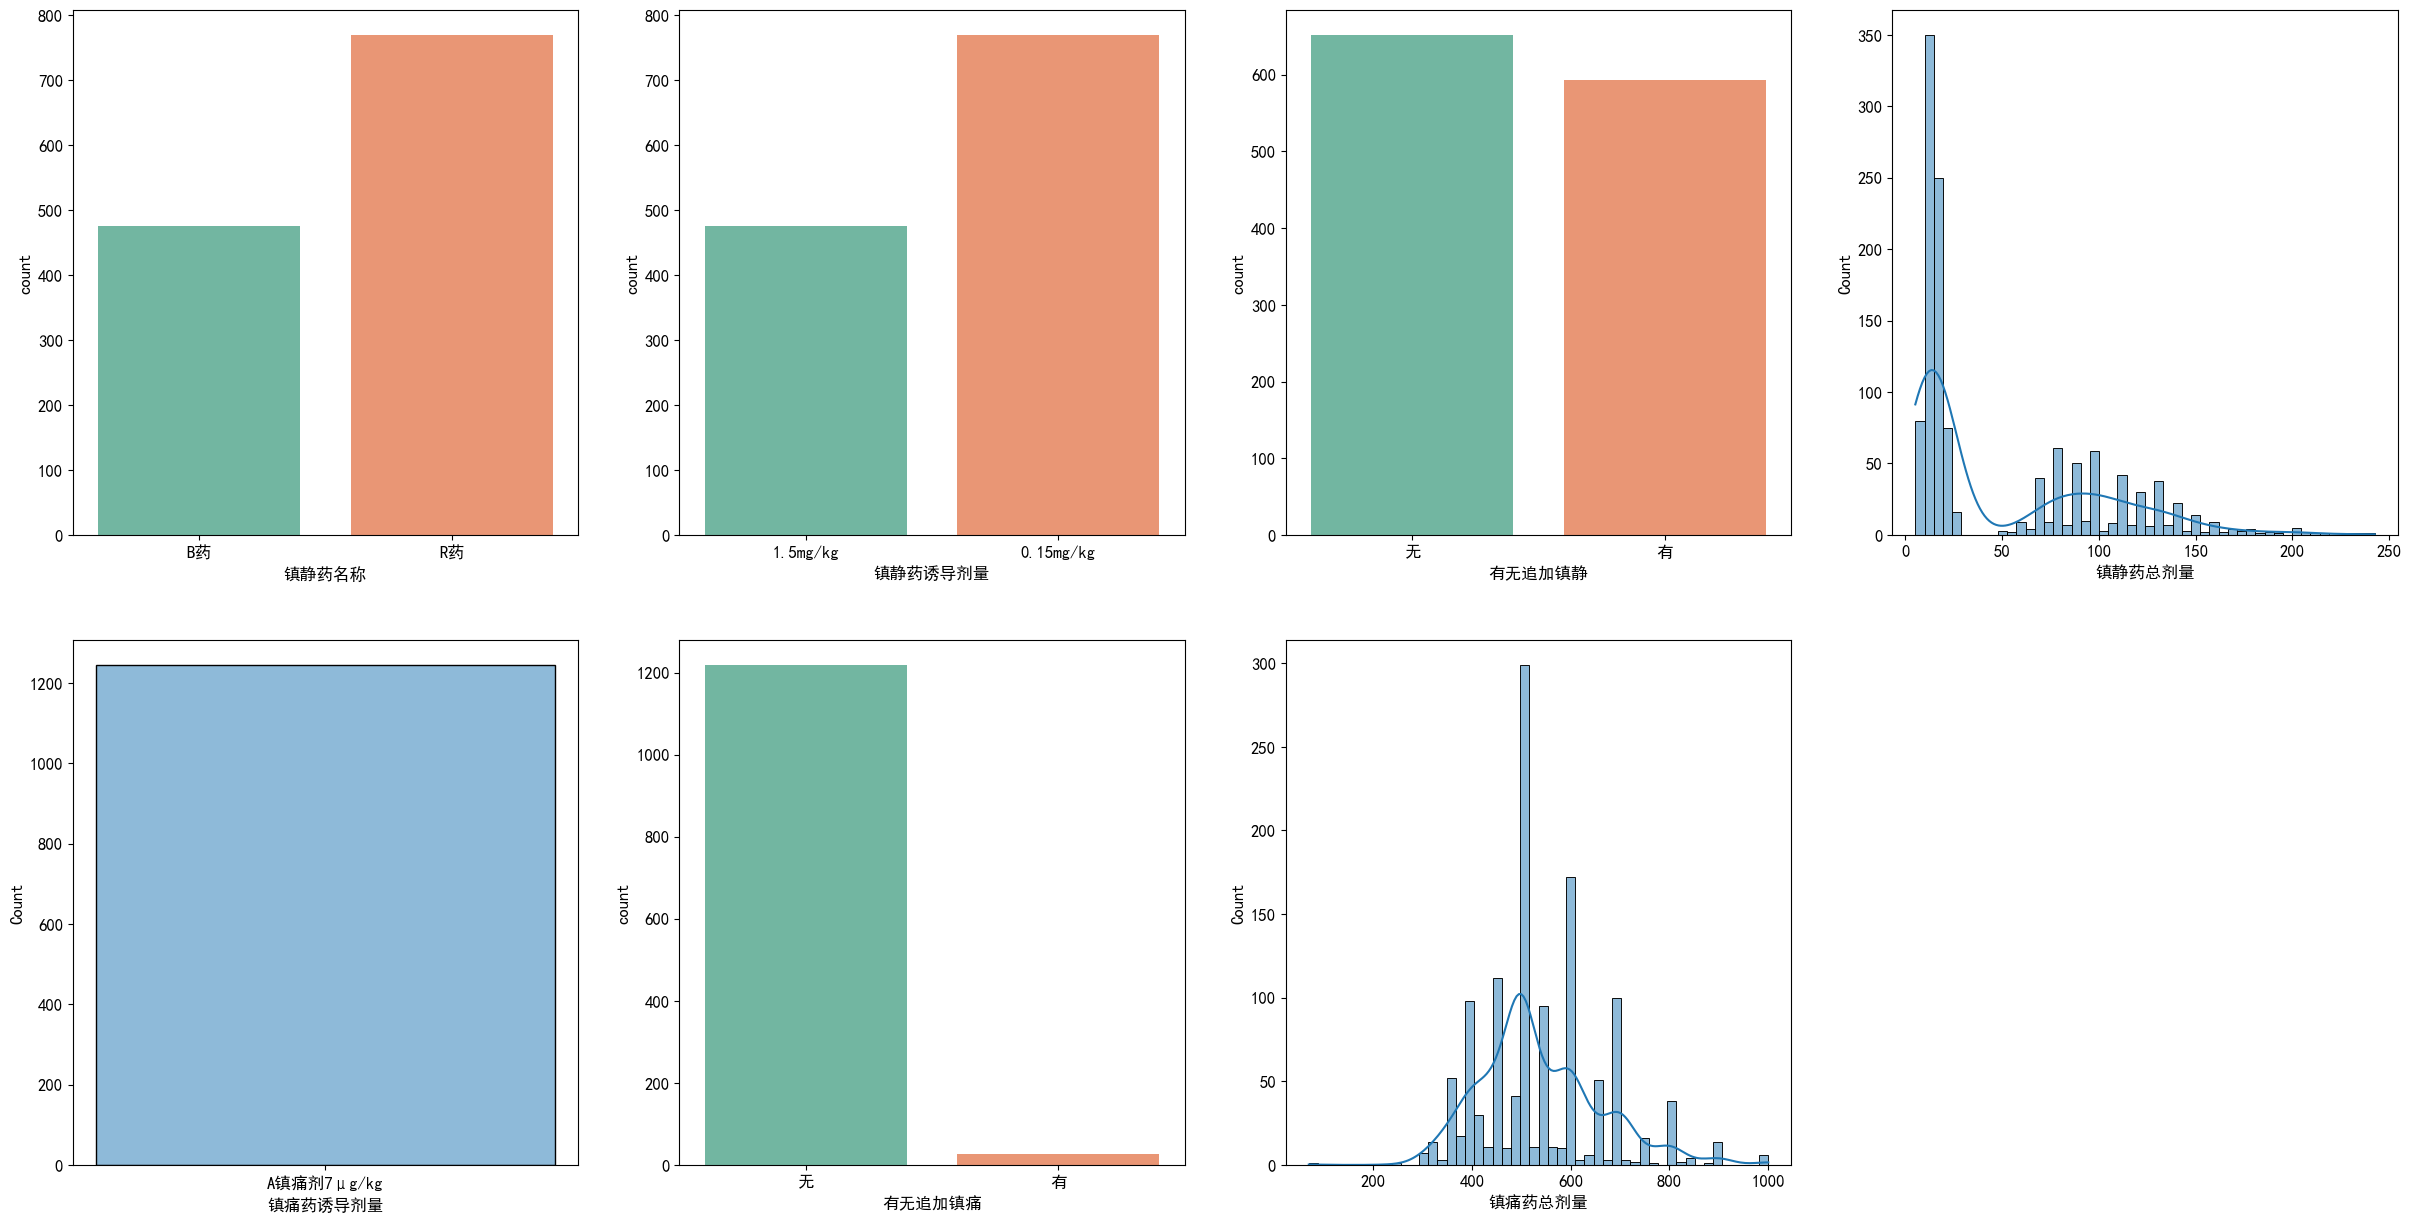

In [319]:
plt.figure(figsize=(30, 15))

plt.subplot(2, 4, 1)
sns.countplot(x='镇静药名称', palette='Set2', data = df2)

plt.subplot(2, 4, 2)
sns.countplot(x='镇静药诱导剂量', palette='Set2', data = df2)

plt.subplot(2, 4, 3)
sns.countplot(x='有无追加镇静', palette='Set2', data = df2)

plt.subplot(2, 4, 4)
sns.histplot(df2['镇静药总剂量'], kde=True, bins=50)

plt.subplot(2, 4, 5)
sns.histplot(df2['镇痛药诱导剂量'], kde=True, bins=50)  # ----删掉！

plt.subplot(2, 4, 6)
sns.countplot(x='有无追加镇痛', palette='Set2', data = df2)

plt.subplot(2, 4, 7)
sns.histplot(df2['镇痛药总剂量'], kde=True, bins=50)

plt.show()

### <center>医生满意度评分

<Axes: xlabel='内镜医生满意度', ylabel='count'>

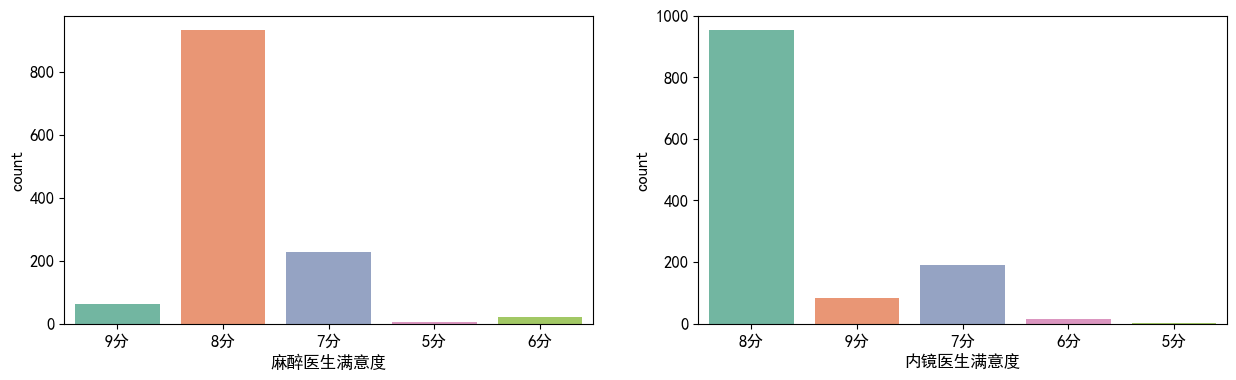

In [338]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='麻醉医生满意度', palette='Set2', data = df2)
plt.subplot(1, 2, 2)
sns.countplot(x='内镜医生满意度', palette='Set2', data = df2)

### <center>术中不良反应

<Axes: xlabel='术中其他', ylabel='count'>

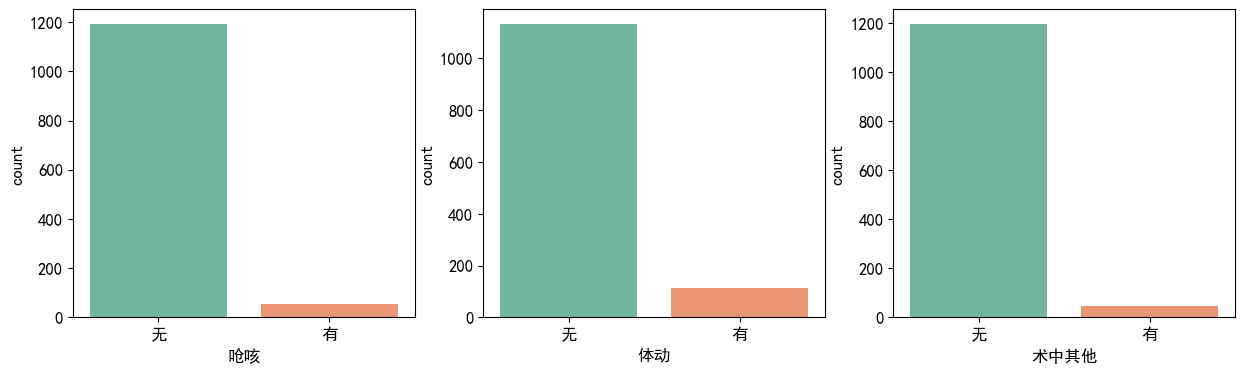

In [339]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.countplot(x='呛咳', palette='Set2', data = df2)
plt.subplot(1, 3, 2)
sns.countplot(x='体动', palette='Set2', data = df2)
plt.subplot(1, 3, 3)
sns.countplot(x='术中其他', palette='Set2', data = df2)